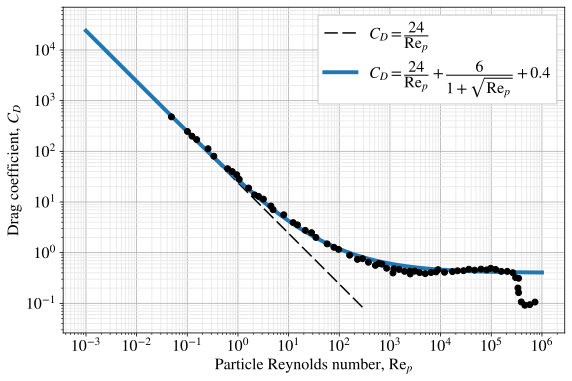

In [1]:
#########################################################
#########################################################
# Lecture 09 - Fall Velocity
# Created for CEE 474 / CEWA 574, Spring 2021
# By Jacob A. Morgan, Ph.D.
#    University of Washington
#########################################################
#########################################################
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']=['STIXGeneral',
                             'Times New Roman',
                             'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'stix'

# data digitized from Southard textbook, figure 2-2:
Re_exp = [0.04857,0.10055,0.12383,0.15332,0.25681,0.3343,0.62599,0.77049,0.94788,1.05956,
       1.62605,2.13654,2.55138,3.18268,4.46959,4.92143,8.02479,12.28672,14.97393,21.33792,
       28.3517,34.55246,57.57204,78.3929,96.88149,159.92596,227.64082,287.31738,375.98547,
       516.14355,607.03827,695.8316,861.51953,1147.26099,1194.43213,1513.70166,1939.70557,
       2511.91235,2461.13232,3106.32397,3845.99561,4974.59424,6471.96875,8135.45166,8910.81543,
       11949.91309,17118.62109,21620.08203,28407.60352,36064.10156,46949.58594,62746.32422,
       80926.54688,97655.00781,122041.875,157301.8125,206817.7188,266273,346423.5938,302216.5938,
       335862.5313,346202,391121.5938,460256.375,575194.4375,729407.625]
Cd_exp = [479.30811,247.18175,199.24072,170.60068,112.62481,80.21341,45.37168,39.89885,34.56996,
       28.01445,18.88166,13.80322,12.9089,11.41266,8.35254,7.08445,5.59686,3.92277,3.53845,
       2.75253,2.48307,1.99905,1.49187,1.27743,1.1592,0.89056,0.7368,0.75983,0.64756,0.56107,
       0.61246,0.5939,0.49308,0.39722,0.48327,0.46639,0.42725,0.37951,0.43157,0.43157,0.40364,
       0.3854,0.40577,0.41649,0.46173,0.41013,0.42295,0.43854,0.44086,0.4714,0.45225,0.47362,
       0.45682,0.49104,0.46639,0.42725,0.42725,0.40171,0.31214,0.32189,0.20053,0.16249,0.10658,
       0.09175,0.09417,0.10601]
# plot particle Reynolds number vs. drag coefficient
Rep = 10.**np.linspace(-3,6,101)
CD = 24/Rep+6/(1+np.sqrt(Rep))+0.4
Repstokes = 10.**np.linspace(-3,2.5,2)
CDstokes = 24/Repstokes

fig, ax = plt.subplots(figsize=(9,6))
# ax.plot([1,1],[min(CDstokes),max(CD)], '--k', 
#         lw=2, dashes=[3,2])
# ax.arrow(1,10**4,0.25e1,0, head_length=0.35e1, head_width=0.35e4, 
#          color=[.7,.7,.7], lw=1, ec='k')
# ax.arrow(1,10**4,-7e-1,0, head_length=1.49e-1, head_width=0.35e4, 
#          color='k', lw=3, ec=None)
ax.plot(Repstokes,CDstokes, '--k', dashes=[9,3],
        label='$C_D = \dfrac{24}{\mathrm{Re}_p}$')
ax.plot(Rep,CD, color='tab:blue', lw=4,
        label='$C_D = \dfrac{24}{\mathrm{Re}_p}+\dfrac{6}{1+\sqrt{\mathrm{Re}_p}}+0.4$')
ax.plot(Re_exp,Cd_exp, '.k', ms=12)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Drag coefficient, $C_D$')
ax.set_xlabel('Particle Reynolds number, $\mathrm{Re}_p$')
ax.set_xticks(10.**np.arange(-3,7))
ax.set_yticks(10.**np.arange(-1,5))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12))
ax.axis('equal')
ax.grid(which='both')
ax.grid(which='minor',color=[.9,.9,.9])
ax.set_axisbelow(True)
ax.legend(framealpha=1, fancybox=False)
plt.show()


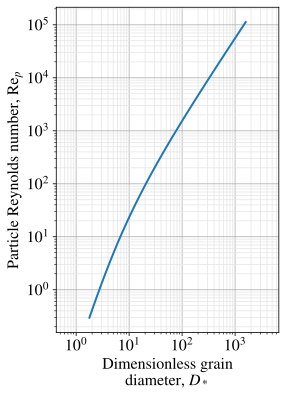

In [2]:
import scipy.optimize
import functools

Dstar = 10.**np.linspace(0.25,3.2,101)
nu = 1.002e-3 # viscosity (Pa-s)
g = 9.81 # gravity (m/s2)
s = 2.65 # specific gravity
D = Dstar/((s-1)*g/nu**2)**(1/3)

def turbfall(w0,D,nu,g,s):
    Rep = w0*D/nu
    CD = 24/Rep+6/(1+np.sqrt(Rep))+0.4
    Dstar = D*((s-1)*g/nu**2)**(1/3)
    return 3/4*CD*Rep**2-Dstar**3

w0 = np.zeros_like(D)
win = 0.1
for idx,Di in enumerate(D):
    func = functools.partial(turbfall, D=Di, nu=nu, g=g, s=s)
    w = scipy.optimize.newton(func,win)
    w0[idx] = w
    win = w # use the initial guess from previous solution

Rep = w0*D/nu

fig, ax = plt.subplots(figsize=(4,6))
ax.plot(Dstar,Rep, lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12))
ax.axis('equal')
ax.grid(which='both')
ax.grid(which='minor',color=[.9,.9,.9])
ax.set_axisbelow(True)
ax.set_ylabel('Particle Reynolds number, $\mathrm{Re}_p$')
ax.set_xlabel('Dimensionless grain\ndiameter, $D_*$')
plt.show()